**PREDICTING CUSTOMER BEHAVIOUR USING KNN CLASSIFIER**

In [39]:
import numpy as np
import pandas as pd

In [40]:
path = "/content/drive/MyDrive/Excel-and-CSV-files/purchase_history.csv"
df = pd.read_csv(path)
df.head()

,Customer ID,Gender,Age,Salary,Product ID,Price,Purchased
0,1,Female,49,61000,P01,2000,1
1,2,Male,36,30000,P02,2000,1
2,3,Female,26,81000,P02,3500,1
3,4,Female,32,74000,P01,7000,0
4,5,Female,42,56000,P01,5000,0


In [41]:
df.count()

,0
Customer ID,1000
Gender,1000
Age,1000
Salary,1000
Product ID,1000
Price,1000
Purchased,1000


In [42]:
len(df)

1000

In [43]:
gender_encoded = pd.get_dummies(df["Gender"]).apply(lambda x: x.astype(int))
gender_encoded

,Female,Male
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
995,0,1
996,0,1
997,1,0
998,0,1


In [44]:
gender_encoded = pd.get_dummies(df['Gender'],drop_first= True).astype(int)

In [45]:
gender_encoded

,Male
0,0
1,1
2,0
3,0
4,0
...,...
995,1
996,1
997,0
998,1


In [46]:
df = pd.concat([df, gender_encoded], axis=1)
df

,Customer ID,Gender,Age,Salary,Product ID,Price,Purchased,Male
0,1,Female,49,61000,P01,2000,1,0
1,2,Male,36,30000,P02,2000,1,1
2,3,Female,26,81000,P02,3500,1,0
3,4,Female,32,74000,P01,7000,0,0
4,5,Female,42,56000,P01,5000,0,0
...,...,...,...,...,...,...,...,...
995,996,Male,21,73000,P02,5000,1,1
996,997,Male,62,54000,P01,5000,0,1
997,998,Female,41,20000,P03,2000,0,0
998,999,Male,22,29000,P03,5000,0,1


In [47]:
x = df[['Male','Age','Salary','Price']].to_numpy()
x

array([[    0,    49, 61000,  2000],
       [    1,    36, 30000,  2000],
       [    0,    26, 81000,  3500],
       ...,
       [    0,    41, 20000,  2000],
       [    1,    22, 29000,  5000],
       [    0,    49, 36000,  3500]])

In [48]:
y = df['Purchased'].to_numpy()
y

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

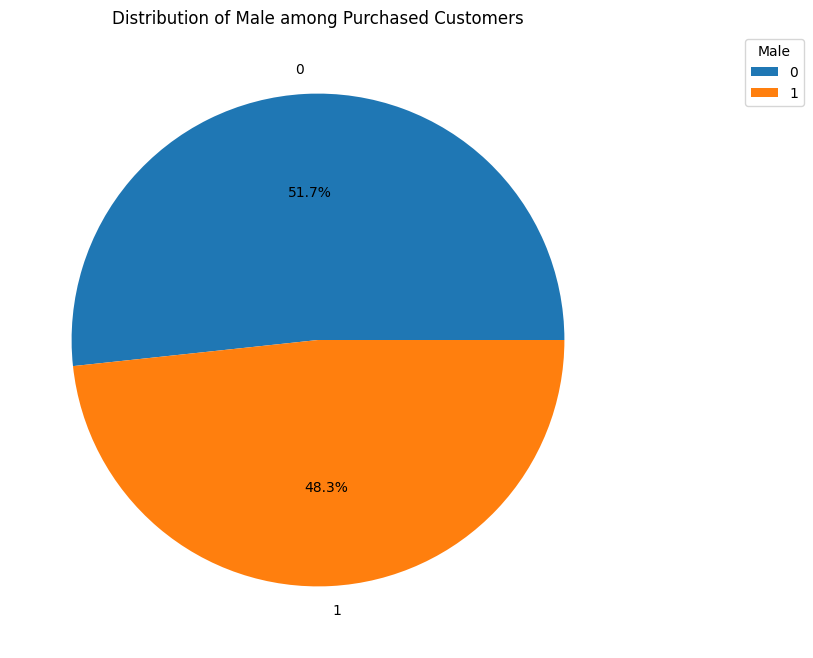

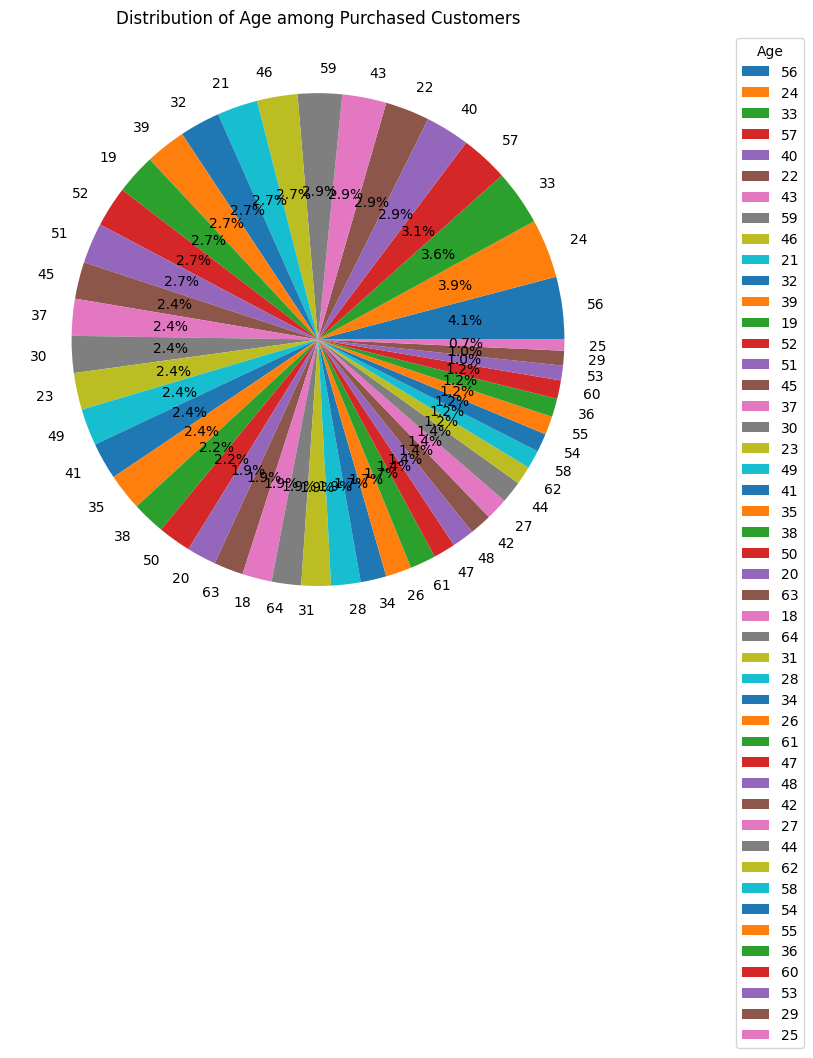

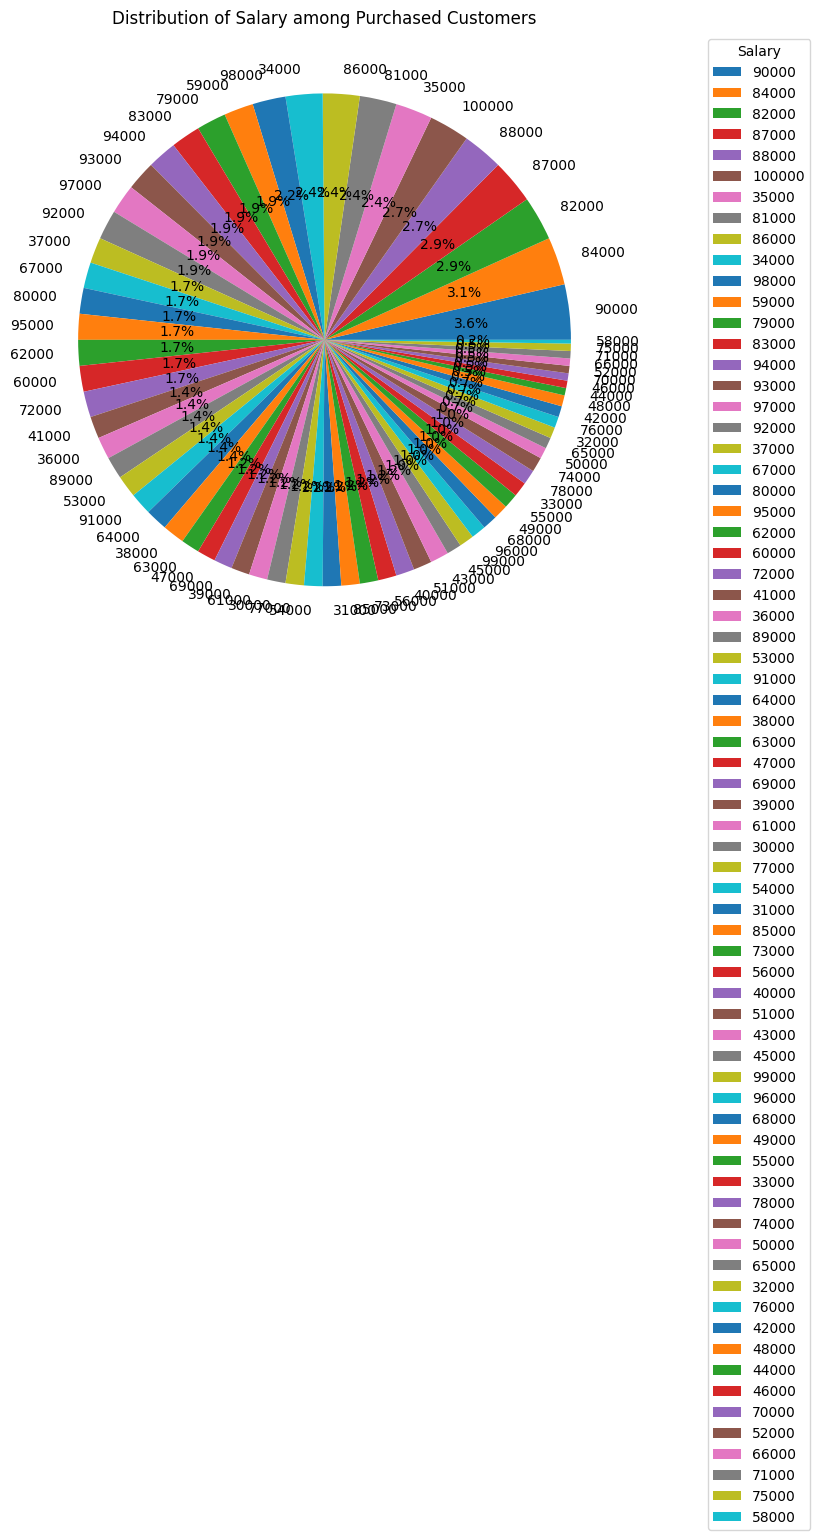

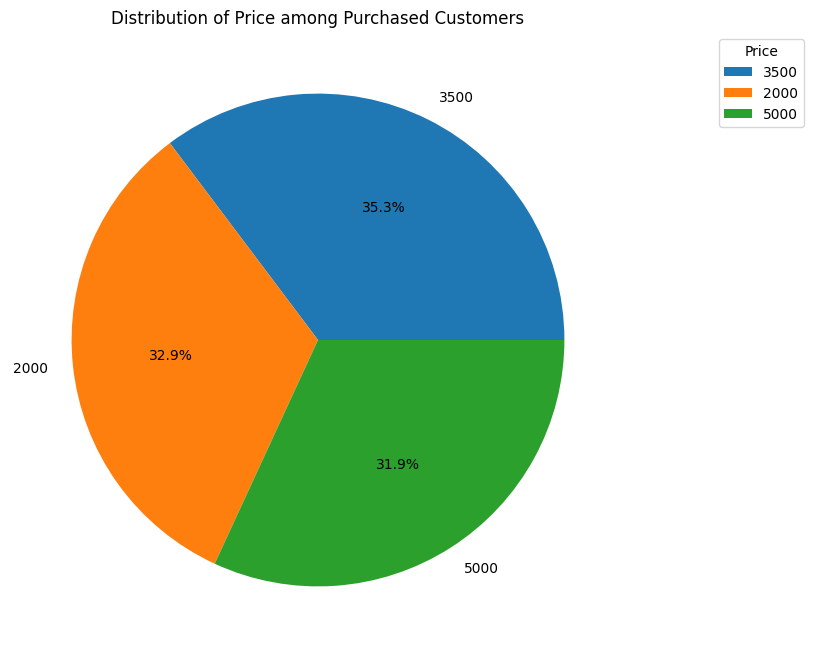

In [38]:
import matplotlib.pyplot as plt
for var in ['Male', 'Age', 'Salary', 'Price']:

    purchased_data = df[df['Purchased'] == 1]

    counts = purchased_data[var].value_counts()
    plt.figure(figsize=(8,8))
    plt.pie(counts, labels = counts.index, autopct='%1.1f%%')
    plt.title(f'Distribution of {var} among Purchased Customers')
    plt.legend(title=var, loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.show()

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state= 40)

In [51]:
x_train

array([[    1,    37, 27000,  2000],
       [    0,    26, 41000,  2000],
       [    0,    51, 31000,  3500],
       ...,
       [    0,    39, 20000,  2000],
       [    1,    20, 33000,  5000],
       [    0,    44, 35000,  7000]])

In [52]:
x_test

array([[     1,     56,  80000,   5000],
       [     0,     64,  27000,   3500],
       [     0,     28,  33000,   7000],
       [     0,     19,  22000,   7000],
       [     1,     47,  41000,   3500],
       [     0,     36,  28000,   5000],
       [     0,     27,  27000,   2000],
       [     1,     61,  58000,   5000],
       [     0,     44,  43000,   2000],
       [     0,     24,  74000,   2000],
       [     1,     50,  65000,   7000],
       [     1,     64,  68000,   7000],
       [     1,     52,  82000,   5000],
       [     0,     21,  60000,   7000],
       [     0,     35,  24000,   2000],
       [     0,     57,  74000,   7000],
       [     1,     19,  32000,   7000],
       [     0,     32,  79000,   7000],
       [     1,     57,  61000,   3500],
       [     1,     39,  90000,   3500],
       [     1,     21,  93000,   3500],
       [     0,     62,  36000,   2000],
       [     1,     61,  28000,   2000],
       [     1,     24,  95000,   7000],
       [     1, 

In [53]:
y_train

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,

In [54]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1])

In [55]:
len(x_train)

800

In [56]:
len(x_test)

200

In [57]:
len(y_train)

800

In [58]:
len(y_test)

200

In [59]:
#Scaling the features
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [61]:
x_train

array([[ 1.06458129, -0.31401346, -1.35901411, -1.30231002],
       [-0.93933644, -1.1210574 , -0.76393404, -1.30231002],
       [-0.93933644,  0.71313337, -1.18899123, -0.48474684],
       ...,
       [-0.93933644, -0.1672782 , -1.65655414, -1.30231002],
       [ 1.06458129, -1.56126318, -1.10397979,  0.33281635],
       [-0.93933644,  0.19955996, -1.01896835,  1.42290059]])

In [62]:
x_test

array([[ 0.98019606,  1.14940743,  0.94486012,  0.20166602],
       [-1.02020406,  1.71789332, -1.27538312, -0.59438405],
       [-1.02020406, -0.84029322, -1.02403483,  1.26306611],
       [-1.02020406, -1.47983985, -1.48484003,  1.26306611],
       [ 0.98019606,  0.50986079, -0.68890378, -0.59438405],
       [-1.02020406, -0.27180732, -1.23349174,  0.20166602],
       [-1.02020406, -0.91135396, -1.27538312, -1.39043412],
       [ 0.98019606,  1.50471111,  0.02324972,  0.20166602],
       [-1.02020406,  0.29667858, -0.60512101, -1.39043412],
       [-1.02020406, -1.12453617,  0.69351183, -1.39043412],
       [ 0.98019606,  0.723043  ,  0.31648939,  1.26306611],
       [ 0.98019606,  1.71789332,  0.44216354,  1.26306611],
       [ 0.98019606,  0.86516448,  1.02864288,  0.20166602],
       [-1.02020406, -1.33771838,  0.10703248,  1.26306611],
       [-1.02020406, -0.34286806, -1.40105727, -1.39043412],
       [-1.02020406,  1.22046816,  0.69351183,  1.26306611],
       [ 0.98019606, -1.

In [63]:
#choose a perfect ML algorithms.

I choose KNN algorithm.

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:

k = 5
knn = KNeighborsClassifier(n_neighbors= k)

In [66]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [67]:
y_pred = knn.predict(x_test)

In [68]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1])

In [69]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1])

In [70]:
knn.score(x_test,y_test)*100

78.5

In [71]:
import pickle

In [72]:
with open('knn_model.pickle','wb') as f:
    pickle.dump(knn,f)

In [73]:
with open('scaler.pickle','wb') as f:
    pickle.dump(scaler,f)

In [74]:
!ls

drive  knn_model.pickle  sample_data  scaler.pickle
